Step 1: Import Libraries and Load Data

In [ ]:
'''
Student 1 : Steven SHYAKA
Student 2 : Festus BIGIRIMANA

Complete the code as discussed the class :
Load any data of you choice
Make sure you clearly define the X and the Y after loading
Ensure the number of classes is accurate
Add atleast 1 layer with 128 neurons

complete and fit to data
'''

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Step 2: Visualize the Data

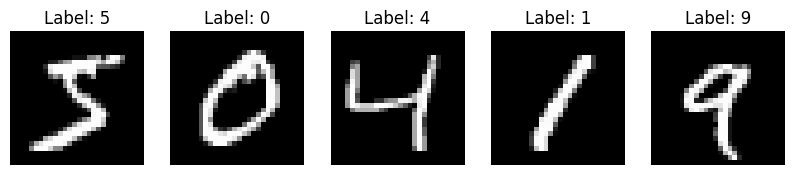

In [2]:
# Visualize the first few images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Step 3: Preprocess Data

In [3]:
# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images for input into the model
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
num_classes = len(set(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

Step 4: Define the Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))  # First hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))                      # Second hidden layer with 64 neurons
model.add(Dense(num_classes, activation='softmax'))          # Output layer with softmax for classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 5: Compile the Model

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Step 6: Train the Model

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8617 - loss: 0.4705 - val_accuracy: 0.9578 - val_loss: 0.1407
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9642 - loss: 0.1189 - val_accuracy: 0.9694 - val_loss: 0.1006
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0778 - val_accuracy: 0.9707 - val_loss: 0.1041
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0534 - val_accuracy: 0.9640 - val_loss: 0.1263
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9858 - loss: 0.0456 - val_accuracy: 0.9732 - val_loss: 0.0990
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9740 - val_loss: 0.0948
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accuracy: 0.9755 - val_loss: 0.0937
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9923 - loss: 0.0234 - 

Step 7: Save the Model

In [7]:
# Save the model
model.save('mnist_model.h5')

Step 8: Load the Model

In [8]:
# Load the model
loaded_model = tf.keras.models.load_model('mnist_model.h5')

Step 9: Evaluate the Model

In [9]:
# Evaluate the model
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.1093
Test Accuracy: 97.75%


Step 10: Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


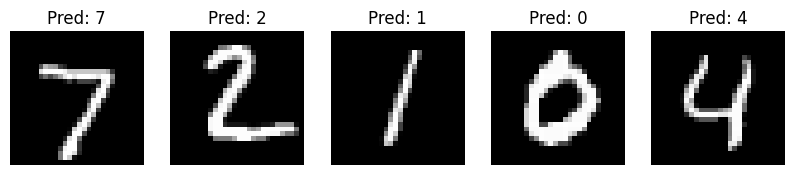

In [10]:
# Make predictions
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

Step 11: Model Summary

In [11]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)